In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pickle
time_dict = pickle.load(open('time_dict-2.pkl', 'rb'))

In [3]:
time_dict.keys()

dict_keys([('ercc', 't-SNE'), ('ercc', 'art-SNE'), ('ercc', 'ForceAtlas2_ANNOY'), ('ercc', 'UMAP'), ('ercc', 'TriMap'), ('ercc', 'PaCMAP'), ('ercc', 'PHATE'), ('monocyte', 't-SNE'), ('monocyte', 'art-SNE'), ('monocyte', 'ForceAtlas2_ANNOY'), ('monocyte', 'UMAP'), ('monocyte', 'TriMap'), ('monocyte', 'PaCMAP'), ('monocyte', 'PHATE'), ('duo4eq', 't-SNE'), ('duo4eq', 'art-SNE'), ('duo4eq', 'ForceAtlas2_ANNOY'), ('duo4eq', 'UMAP'), ('duo4eq', 'TriMap'), ('duo4eq', 'PaCMAP'), ('duo4eq', 'PHATE'), ('duo8eq', 't-SNE'), ('duo8eq', 'art-SNE'), ('duo8eq', 'ForceAtlas2_ANNOY'), ('duo8eq', 'UMAP'), ('duo8eq', 'TriMap'), ('duo8eq', 'PaCMAP'), ('duo8eq', 'PHATE'), ('kazer', 't-SNE'), ('kazer', 'art-SNE'), ('kazer', 'ForceAtlas2_ANNOY'), ('kazer', 'UMAP'), ('kazer', 'TriMap'), ('kazer', 'PaCMAP'), ('kazer', 'PHATE'), ('muraro', 't-SNE'), ('muraro', 'art-SNE'), ('muraro', 'ForceAtlas2_ANNOY'), ('muraro', 'UMAP'), ('muraro', 'TriMap'), ('muraro', 'PaCMAP'), ('muraro', 'PHATE'), ('kang', 't-SNE'), ('kan

In [4]:
dataset1 = ['ercc', 'muraro', 'monocyte', 'duo4eq', 'mammoth', 'kang', 'stuart', 'kazer', 'hierarchical_three', 'MNIST', 'micebrain', 'miceembryo']
dataset2 = ['ercc', 'muraro', 'monocyte', 'duo4eq', 'mammoth', 'kang', 'stuart', 'kazer', 'hierarchical_three', 'MNIST']

In [5]:
sample_size1 = np.array([1015, 2282, 2612, 3994, 10000, 13999, 30672, 59286, 62500, 70000, 1306127, 2058652])
sample_size2 = np.array([1015, 2282, 2612, 3994, 10000, 13999, 30672, 59286, 62500, 70000])

In [6]:
algos1 = ['t-SNE', 'ForceAtlas2_ANNOY', 'UMAP', 'TriMap', 'PaCMAP']
algos2 = ['art-SNE', 'PHATE']

In [7]:
algo_time = dict()

In [8]:
for algo in algos1:
    algo_time[algo] = []
    for data in dataset1:
        algo_time[algo].append(time_dict[(data, algo)])
        
for algo in algos2:
    algo_time[algo] = []
    for data in dataset2:
        algo_time[algo].append(time_dict[(data, algo)])

In [9]:
name_algo = dict()
for algo in algos1+algos2:
    name_algo[algo] = algo

In [10]:
name_algo['ForceAtlas2_ANNOY'] = 'ForceAtlas2'

In [11]:
name_algo

{'t-SNE': 't-SNE',
 'ForceAtlas2_ANNOY': 'ForceAtlas2',
 'UMAP': 'UMAP',
 'TriMap': 'TriMap',
 'PaCMAP': 'PaCMAP',
 'art-SNE': 'art-SNE',
 'PHATE': 'PHATE'}

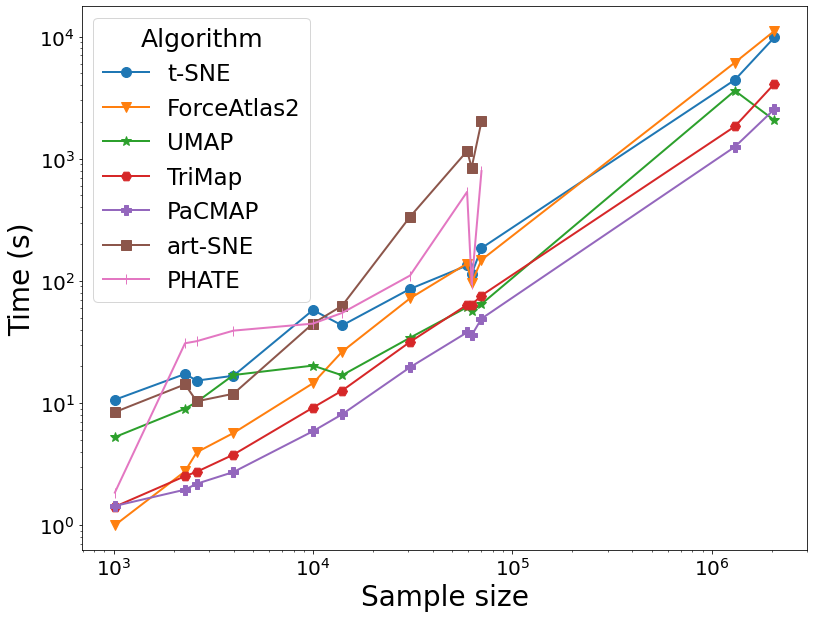

In [30]:
fig, ax = plt.subplots(figsize=(13,10))
marker = ['o', 'v', '*', 'H', 'P', 's', '|']
#plt.figure(figsize=(13,10))
for algo, ind in zip(algos1,range(len(algos1))):
    ax.plot(sample_size1, np.array(algo_time[algo]), marker=marker[ind], ms=10, lw=2, label=name_algo[algo])
for algo, ind in zip(algos2,range(len(algos2))):
    ax.plot(sample_size2, np.array(algo_time[algo]), marker=marker[ind + len(algos1)], ms=10, lw=2, label=name_algo[algo])
plt.legend(title="Algorithm", fontsize=23, title_fontsize=25)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sample size', fontsize=28)
plt.ylabel('Time (s)', fontsize=28)
plt.savefig("time_figure")
plt.show()